<a href="https://colab.research.google.com/github/JuliaKoryukova/Machine-Learning/blob/main/07_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='#11a642' size='6'>**Кластерный анализ**</font>  


Работа основана на тестовых данных Диабет.

Версию данных можно найти и загрузить с ресурса Kaggle: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

**Описание данных**

Датасет собран для женщин старше 21 года индейского племени Пима (самоназвание — акимель-оодхам). Пима проживают в центральной и южной части штата Аризона (США), а также в мексиканском штате Сонора.

Изучаются следующие характеристики:
* Pregnancies: Количество беременностей.
* Glucose: Концентрация глюкозы в плазме крови за 2 часа после теста на толерантность к глюкозе.
* BloodPressure: Диастолическое артериальное давление, измеренное в миллиметрах ртутного столба.
* SkinThickness: Толщина кожной складки на трицепсе, выраженная в миллиметрах.
* Insulin: Уровень 2-часового сывороточного инсулина, измеряемый в микроединицах на миллилитр.
* BMI: Индекс массы тела, рассчитываемый как вес в килограммах, делённый на квадрат роста в метрах.
* DiabetesPedigreeFunction: Функция, отражающая семейную предрасположенность к диабету.
* Age: Возраст участниц, измеряемый в годах.
* Outcome: таргет или бинарная переменная, указывающая на наличие или отсутствие диабета (0 - диабета нет, 1 - диабет есть).






**Описание плана работы**

1. Загрузка данных.
2. Разведочный анализ данных (EDA).
3. Подготовка данных к обучению.
4. Оптимальное число кластеров. Определить методом локтя или силуэта для k-means. Сравнить с target (Outcome).
5. Метод k-means с визуализацией и оценкой качества. Выгрузка модели k-means.
6. Метод иерархической кластеризации с выводом дендрограммы. Выгрузка модели иерархической кластеризации.
7. Выгрузка работы на kaggle.

# <font color='#11a642' size='6'> **Импорт и установка библиотек**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import pandas as pd
import seaborn as sns
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from joblib import dump, load
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.metrics import adjusted_rand_score, silhouette_samples, silhouette_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# <font color='#11a642' size='6'> **Загрузка данных**

In [ ]:
!gdown 1a1eHrPp-hsQutFO4f-A1fljyzZR06GYp

Downloading...
From: https://drive.google.com/uc?id=1a1eHrPp-hsQutFO4f-A1fljyzZR06GYp
To: /content/diabetes.csv
100% 23.1k/23.1k [00:00<00:00, 7.98MB/s]


In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## <font color='#11a642' size='5'> Определите роли переменных (целевая переменная, независимые переменные)

In [ ]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
x.shape, y.shape

((768, 8), (768,))

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

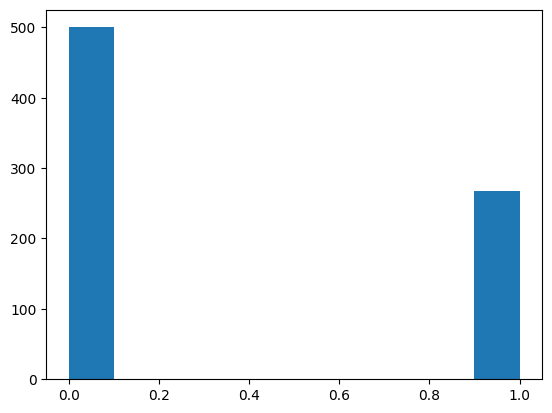

In [ ]:
# Распределение целевой переменной
plt.hist(y)

# <font color='#11a642' size='6'> **Разведочный анализ данных**

## <font color='#11a642' size='5'> Оценка размера датасета





1.   Сколько весит датасет
2.   Сколько строк и столбцов


In [ ]:
# Сколько kБ датасет
size_byte = df.memory_usage(index=True).sum()
size_kb = size_byte / 1024

size_df = size_kb

print(f"The dataset df is {size_df:.2f} kB")


The dataset df is 54.12 kB


In [ ]:
# Сколько строк и столбцов
df.shape

(768, 9)

## <font color='#11a642' size='5'> Анализ категориальных признаков


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


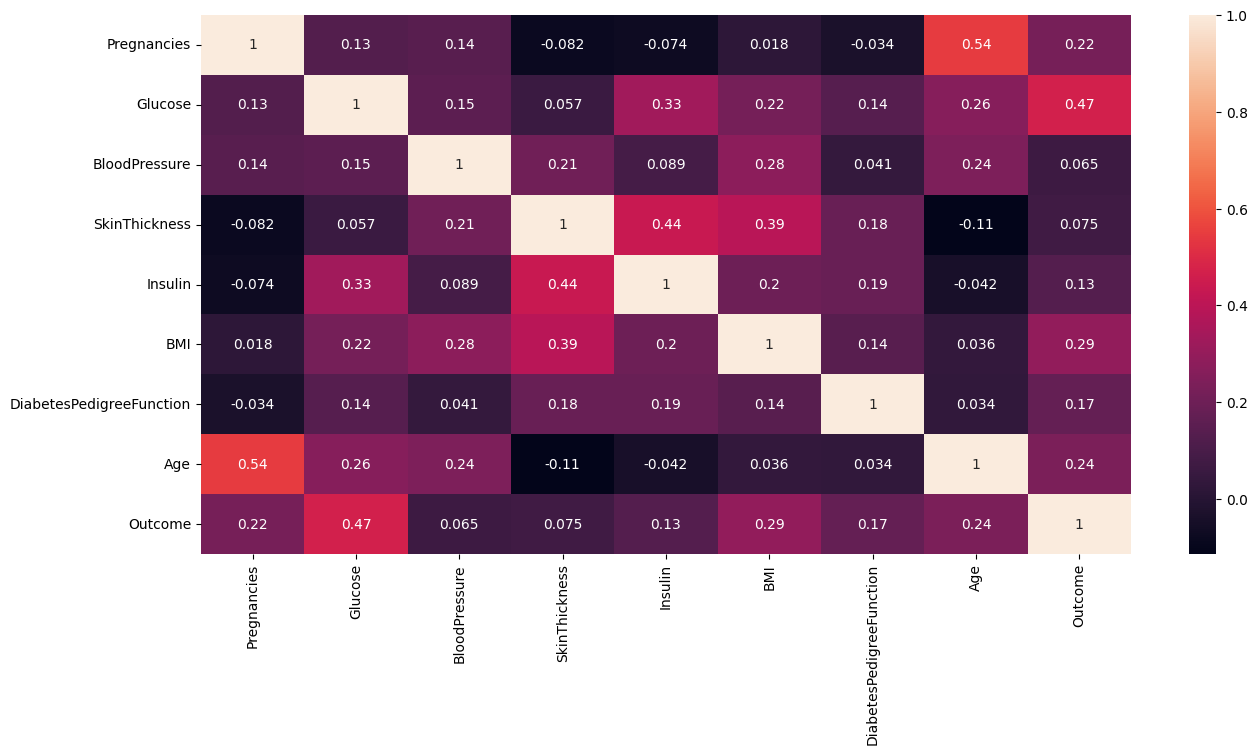

In [ ]:
# создание матрицы
corr_matrix = df.corr()

# отрисовка матрицы
plt.figure(figsize=(15, 7))
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

## <font color='#11a642' size='5'> Анализ пропусков


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


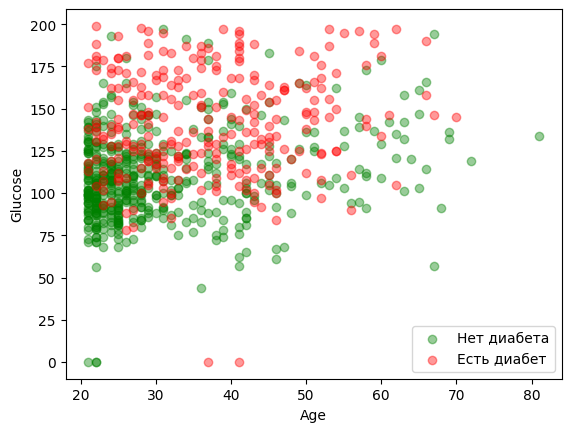

In [ ]:
# разделение датасета на 2 части - люди у которых нет диабета и у которых есть
df_0 = df[df.Outcome == 0]
df_1 = df[df.Outcome == 1]

# визуализация зависимости возраста от уровня глюкозы с указанием есть диабет или нет
plt.scatter(df_0.Age, df_0.Glucose, color="green", label="Нет диабета", alpha=0.4)
plt.scatter(df_1.Age, df_1.Glucose, color="red", label="Есть диабет", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend(loc='lower right')
plt.show()

In [ ]:
# видим что на шрафике есть нули, посмотрим кол-во нулей по столбцам
(df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [ ]:
# Обработка нулевых значений в датасете
# колонки в которых надо заменить нули
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# меняем для удобства нули на Nan
df[zero_columns] = df[zero_columns].replace(0, np.NaN)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# кол-во пропусков
df.isna().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Замена нулевых значений в датасете на медианное значение соответсвующих столбцов
# лямбда функция которая заменяет Nan медианой у столбца
replace_median = lambda col: col.fillna(col.median())

# заменить нули медианой у тех кто болеет
df[df.Outcome == 0] = df[df.Outcome == 0].apply(replace_median)

# заменить нули медианой у тех кто не болеет
df[df.Outcome == 1] = df[df.Outcome == 1].apply(replace_median)

In [ ]:
# кол-во пропусков
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


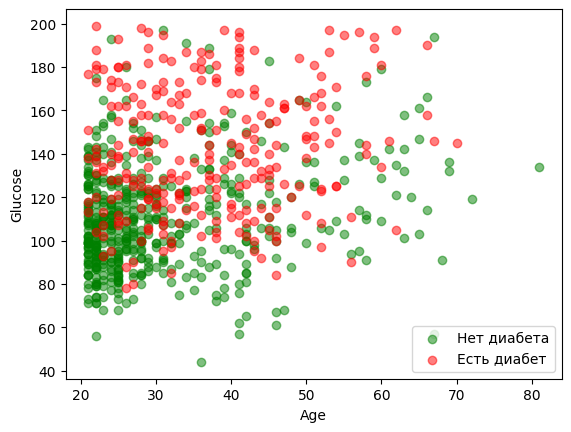

In [ ]:
# проверка что нулей нет на графике
df_0 = df[df.Outcome == 0]
df_1 = df[df.Outcome == 1]

# визуализация зависимости возраста от уровня глюкозы с указанием есть диабет или нет
plt.scatter(df_0.Age, df_0.Glucose, color="green", label="Нет диабета", alpha=0.5)
plt.scatter(df_1.Age, df_1.Glucose, color="red", label="Есть диабет", alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend(loc='lower right')
plt.show()

# <font color='#11a642' size='6'> **Подготовка данных к обучению**

1.   Обработка категориальных переменных
2.   Обработка пропусков
3.   Стоит ли делать нормализацию данных?



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [ ]:
# Стандартизация признаков
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(X_train)
x_test_scaler = scaler.transform(X_test)

In [ ]:
x_train_scaler

array([[-0.85135507, -0.98013068, -0.40478372, ..., -0.60767846,
         0.31079384, -0.79216928],
       [ 0.35657564,  0.16144422,  0.46536842, ..., -0.30213902,
        -0.11643851,  0.56103382],
       [-0.5493724 , -0.50447447, -0.62232176, ...,  0.3725939 ,
        -0.76486207, -0.70759409],
       ...,
       [-0.85135507, -0.75815778,  0.03029235, ...,  0.77997981,
        -0.78607218, -0.28471812],
       [ 1.86648903, -0.31421198,  0.03029235, ..., -0.56948603,
        -1.01938346,  0.56103382],
       [ 0.05459296,  0.73223168, -0.62232176, ..., -0.31486983,
        -0.57700104,  0.30730824]])

# <font color='#11a642' size='6'> **Оптимальное число кластеров**




## <font color='#11a642' size='5'> С помощью метода локтя определяю число кластеров для алгоритма k-means


### <font color='#11a642' size='4'> Реализация метода локтя


In [ ]:
# Используем метод локтя для определения оптимального числа кластеров
max_k = 11  # Максимальное число кластеров для оценки
wcss = []  # Список для хранения суммарных квадратов расстояний до ближайшего центра кластера (WCSS)

# Проходим по всем возможным числам кластеров от 1 до max_k
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x_train_scaler)
    # Метод inertia возвращает WCSS для текущей модели
    wcss.append(kmeans.inertia_)

print("WCSS для каждой модели:")
for i, wcss_value in enumerate(wcss):
    print(f"Кластеров: {i+1}, WCSS: {wcss_value}")

WCSS для каждой модели:
Кластеров: 1, WCSS: 4912.0
Кластеров: 2, WCSS: 4102.690198354499
Кластеров: 3, WCSS: 3480.833579164433
Кластеров: 4, WCSS: 3148.4607705722538
Кластеров: 5, WCSS: 2895.6276775495176
Кластеров: 6, WCSS: 2710.0354523474048
Кластеров: 7, WCSS: 2547.8189073472945
Кластеров: 8, WCSS: 2431.083629727092
Кластеров: 9, WCSS: 2309.4348664332824
Кластеров: 10, WCSS: 2244.9841698968917


### <font color='#11a642' size='4'> Визуализация результата

In [ ]:
# Создаем фигуру с заданными размерами
fig = go.Figure()

# Добавляем линейный график с данными о WCSS по количеству кластеров
fig.add_trace(go.Scatter(x=list(range(1,11)), y=wcss, mode='lines', name='WCSS'))

# Настройка заголовков и осей
fig.update_layout(
    title='Выбор количества кластеров методом локтя',
    xaxis_title='Количество кластеров',
    yaxis_title='WCSS'
)

fig.show()

Оптимальное количество кластеров равно 2.

Добавление новых кластеров не приводит к значительному улучшению качества кластеризации.

## <font color='#11a642' size='5'> С помощью метода силуэта определяю число кластеров для алгоритма k-means


### <font color='#11a642' size='4'> Реализация и визуализация метода силуэта


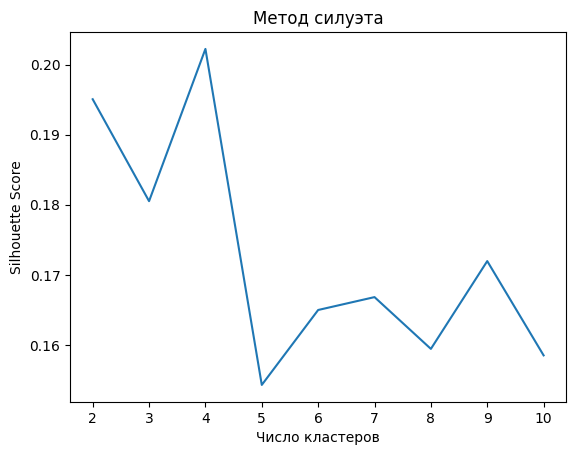

In [ ]:
# Оценка качества кластеризации с использованием метода силуэта
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(x_train_scaler)
    score = silhouette_score(x_train_scaler, kmeans.labels_)
    silhouette_scores.append(score)

# График метода силуэта
plt.plot(range(2, 11), silhouette_scores)
plt.title('Метод силуэта')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette Score')
plt.show()

Оптимальное число кластеров — 4. Это значение соответствует наибольшему коэффициенту силуэта, но значение 2 указывает на наиболее четкую и обоснованную кластеризацию

# <font color='#11a642' size='5'> Метод k-means

Применение метода k-means для оптимального числа кластеров.

### <font color='#11a642' size='4'> Построение модели k-means

In [ ]:
kmeans = KMeans(
    init='k-means++',
    max_iter = 300,
    n_clusters=2,
    n_init=10,
    random_state = 42,
    algorithm='lloyd'
    )
kmeans.fit(x_train_scaler)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [ ]:
# Метки кластеров
labels = kmeans.labels_

### <font color='#11a642' size='4'> Качество работы метода

Расчет Accuracy (по сравнению с Outcome).


In [ ]:
kmeans.inertia_

4102.690198354499

In [ ]:
# Примените модель к тестовым данным
cluster_labels = kmeans.predict(x_test_scaler)

In [ ]:
def cluster_accuracy(cluster_labels, target):
    accuracy = []
    for cluster in np.unique(cluster_labels):
        cluster_target = target[cluster_labels == cluster]
        majority_class = np.bincount(cluster_target).argmax()
        accuracy.append(np.mean(cluster_target == majority_class))
    return np.mean(accuracy)

cluster_accuracy(cluster_labels, y_test)

0.6373737373737374


В данном случае точность 0,68 говорит о том, что метод кластеризации способен правильно отнести около 68 % образцов к правильному кластеру на основе бинарной целевой переменной.

### <font color='#11a642' size='4'> Визуализировать результат кластеризации k-means

Строю визуализацию результатов k-means. На графике отображаю центры кластеров.


In [ ]:
# Сокращение размерности данных с помощью PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaler)

In [ ]:
# Визуализация графика
# Вычисляем центроиды
centroids = kmeans.cluster_centers_

# Построение точечной диаграммы с предсказанными кластерами
data_trace = go.Scatter(x=x_train_pca[:, 0], y=x_train_pca[:, 1], mode='markers',
                        marker=dict(color=cluster_labels, size=8),
                        name='Data Points')

# Отображение центроидов кластеров
centroids_trace = go.Scatter(x=centroids[:, 0], y=centroids[:, 1], mode='markers',
                             marker=dict(color='red', size=12, symbol='cross'),
                             name='Centroids')

# Создаем фигуру, показываем график
fig = go.Figure(data=[data_trace, centroids_trace])
fig.show()

### <font color='#11a642' size='4'> Выгрузка и загрузка модели кластеризации

Применяю библиотеку joblib для выгрузки модели k-means.

Проверка загрузки в блокнот выгруженной модели с помощью той же библиотеки joblib.

In [ ]:
dump(kmeans, 'kmeans_model.joblib')

['kmeans_model.joblib']

In [ ]:
loaded_kmeans = load('kmeans_model.joblib')

# <font color='#11a642' size='5'> Иерархическая кластеризация

Применяю метод иерархической кластеризации с выводом дендрограммы для исходных данных.

### <font color='#11a642' size='4'> Построение модели иерархической кластеризации

In [ ]:
# Построение матрицы связей
z = linkage(x_train_scaler, 'ward')

print("model_ward.shape:", z.shape)

model_ward.shape: (613, 4)


### <font color='#11a642' size='4'> Построение дендрограммы

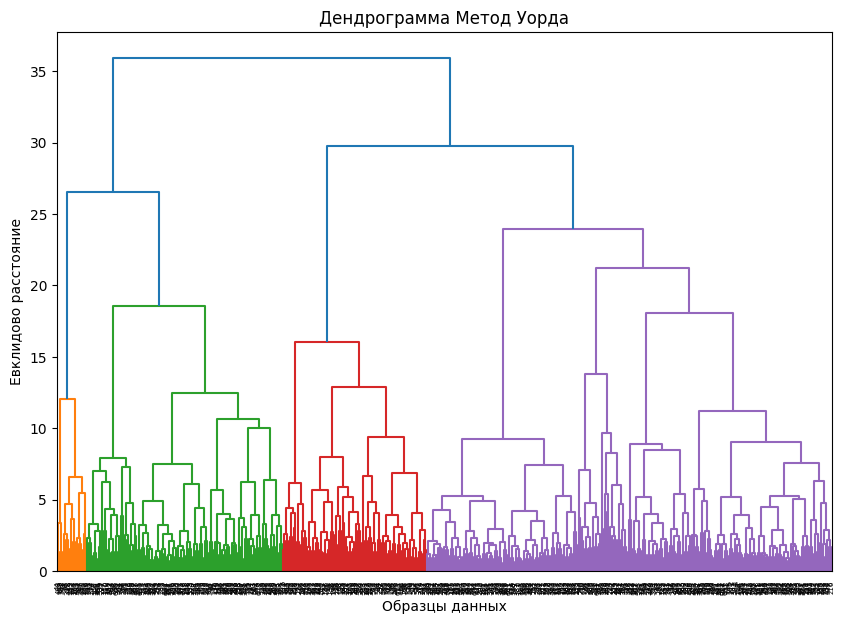

In [ ]:
# Построение дендрограммы
plt.figure(figsize=(10, 7))
dendrogram(z)
plt.title('Дендрограмма Метод Уорда')
plt.xlabel('Образцы данных')
plt.ylabel('Евклидово расстояние')
plt.show()

In [ ]:
z

array([[1.47000000e+02, 2.13000000e+02, 4.10917629e-01, 2.00000000e+00],
       [4.22000000e+02, 4.25000000e+02, 4.27328469e-01, 2.00000000e+00],
       [4.24000000e+02, 4.77000000e+02, 4.29150548e-01, 2.00000000e+00],
       ...,
       [1.21500000e+03, 1.22100000e+03, 2.65636267e+01, 1.79000000e+02],
       [1.21900000e+03, 1.22300000e+03, 2.97760395e+01, 4.35000000e+02],
       [1.22400000e+03, 1.22500000e+03, 3.59406300e+01, 6.14000000e+02]])

In [ ]:
# Построение иерархии с помощью scikit-learn
clustering = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

# Обучение кластеризатора
clustering.fit(x_train_scaler)

AgglomerativeClustering(metric='euclidean')

In [ ]:
labels = clustering.labels_

In [ ]:
labels

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,

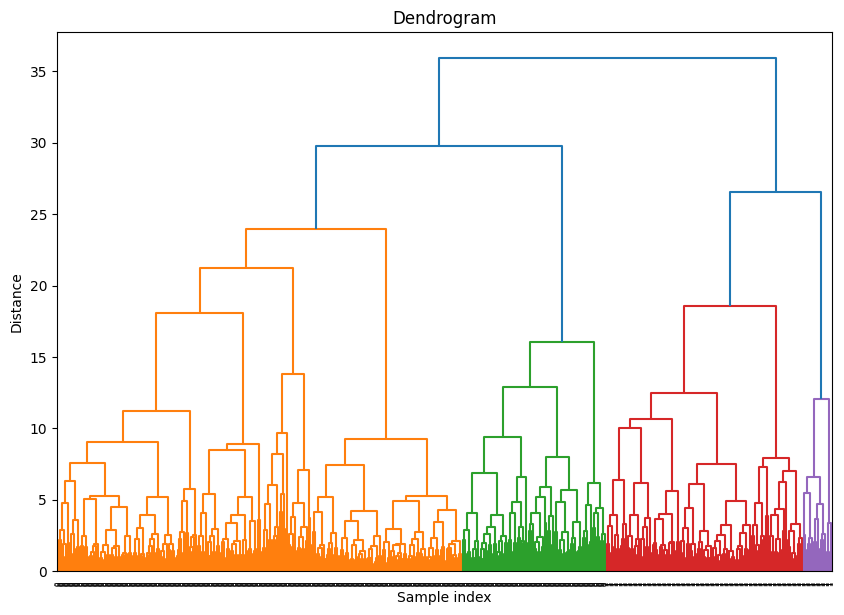

In [ ]:
# Построение дендрограммы
linked = linkage(x_train_scaler, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=labels,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Добавление меток кластеров в DataFrame
X_train['cluster'] = labels

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster
353,1,90,62,12,43,27.2,0.580,24,0
711,5,126,78,27,22,29.6,0.439,40,0
373,2,105,58,40,94,34.9,0.225,25,0
46,1,146,56,0,0,29.7,0.564,29,1
682,0,95,64,39,105,44.6,0.366,22,0
...,...,...,...,...,...,...,...,...,...
451,2,134,70,0,0,28.9,0.542,23,1
113,4,76,62,0,0,34.0,0.391,25,1
556,1,97,70,40,0,38.1,0.218,30,0
667,10,111,70,27,0,27.5,0.141,40,0


In [ ]:
# поместим переменные в словарь
d = {'Prediction' : labels, 'Target' : y_train}

# превратим словарь в датафрейм с соответствующими названиями столбцов
result = pd.DataFrame(d, columns = ['Target', 'Prediction'])
result.head(7)

,Target,Prediction
353,0,0
711,0,0
373,0,0
46,0,1
682,0,0
360,1,0
414,1,0


In [ ]:
# с помощью функции where зададим логическое значение
comparison = np.where(result['Target'] == result['Prediction'], True, False)

# на выходе получим массив Numpy
print(type(comparison))
print(comparison[:5])

<class 'numpy.ndarray'>
[ True  True  True False  True]


In [ ]:
# добавим этот массив в качестве столбца в датафрейм
result['Comparison'] = comparison
result.head()

,Target,Prediction,Comparison
353,0,0,True
711,0,0,True
373,0,0,True
46,0,1,False
682,0,0,True


In [ ]:
# выведем долю совпавших (True) и не совпавших (False) значений
result['Comparison'].value_counts(normalize = True).round(2)

,proportion
Comparison,
True,0.59
False,0.41


### <font color='#11a642' size='4'> Выгрузка и загрузка модели кластеризации




1. Применяю библиотеку joblib для выгрузки модели иерархической кластеризации.

2. Проверка загрузки в блокнот выгруженной модели с помощью той же библиотеки joblib.

In [ ]:
#Выгрузка модели кластеризации для дальнейшего использования

dump(clustering, 'clustering.joblib')

['clustering.joblib']

In [ ]:
# Загружаем сохраненную модель из файла 'clustering.joblib'.
loaded_clustering = load('clustering.joblib')

# <font color='#11a642' size='5'> **Сабмит решения на kaggle**

In [ ]:
df_test_enc = df.copy()

# Применение модели к тестовым данным
cluster_labels = kmeans.predict(x)

# Создание файла сабмита
submission = pd.DataFrame({
    'id': y,
    'Cluster': cluster_labels
})
submission.to_csv('/content/submissions.csv', index=False)

print(submission.head())

# Загрузка результатов на Kaggle
from google.colab import drive
drive.mount('/content/drive')

!pip install kaggle -q
!mkdir ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/config/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions submit -c playground-series-s4e7 -f /content/submissions.csv -m "1 submit"

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but KMeans was fitted without feature names



   id  Cluster
0   1        0
1   0        0
2   1        0
3   0        0
4   1        0
Mounted at /content/drive
100% 3.01k/3.01k [00:00<00:00, 10.1kB/s]
Successfully submitted to Binary Classification of Insurance Cross Selling 